# Part I - Dataset Exploration of Loan Data from Prosper
## by Praise Alli-Johnson

## Introduction

The Loan Data from Prosper data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this <a href='https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000'>data dictionary </a>to understand the dataset's variables.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe, 
prosper = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
prosper.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
# View data set datatypes
prosper.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [5]:
# Get dataset shape
prosper.shape

(113937, 81)

In [6]:
# Dataset descriptive statistics
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
# Take a loser look at data set information
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.



### What is/are the main feature(s) of interest in your dataset?

I am perticularly interested in finding out what features affect loan outcomes, borrower’s Annual Percentage Rate (APR), interest rate and the impact of employment status and debt - to - income ratio on loan status and loan amount.




### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Without careful analysis, we can make a bold assumption that borrowers stated monthly income, loan term, Prosper rating, and current delinquencies will help shed lights on it's effect on APR and loan amount, the Interest rate employment status and occupation will most likely affect Prosper Rating and loan Amount. 

In [8]:
prosper.ListingCreationDate.sample(10)

103730    2013-09-18 13:20:57.640000000
72879     2010-06-25 18:12:12.247000000
21380     2012-11-20 06:56:49.167000000
34387     2014-02-20 13:13:41.877000000
112808    2013-12-09 13:56:51.750000000
52320     2014-02-27 09:47:52.410000000
93465     2007-03-03 13:38:04.773000000
39342     2012-05-09 07:26:41.363000000
28968     2013-05-29 10:14:43.677000000
78607     2013-10-08 21:03:49.457000000
Name: ListingCreationDate, dtype: object

In [9]:
# Let's start by 
# Splitting ListingCreationDate column into year,month,day,time
prosper['year']=prosper['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
prosper['month'] = prosper['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)

In [10]:
# month will now numerical values
# unique values of month
prosper.month.unique()

array(['08', '02', '01', '10', '09', '12', '04', '05', '07', '11', '06',
       '03'], dtype=object)

In [11]:
# replacing numerical values of month with names
prosper.month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)

In [12]:
# Now months should properly named.
prosper.month.unique()

array(['Aug', 'Feb', 'Jan', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul',
       'Nov', 'Jun', 'Mar'], dtype=object)

In [13]:
prosper['ListingCreationDate'] = prosper['ListingCreationDate'].apply(lambda x: x.split("-")[2]).astype(str)

In [14]:
prosper['day'] = prosper['ListingCreationDate'].apply(lambda x: x.split(" ")[0]).astype(str)
prosper['time'] = prosper['ListingCreationDate'].apply(lambda x: x.split(" ")[1]).astype(str)

In [15]:
# drop the original ListingCreationDate column
prosper.drop(columns = ['ListingCreationDate'],inplace = True)

In [16]:
# month into ordered categorical types
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = month_order)
prosper['month'] = prosper['month'].astype(ordered_var)
prosper.groupby('month')['ListingNumber'].count()

month
Jan     11214
Feb     10124
Mar      8032
Apr      7661
May      8641
Jun      8672
Jul      9506
Aug      9202
Sept    10074
Oct     10539
Nov      9952
Dec     10320
Name: ListingNumber, dtype: int64

In [17]:
# Subset the dataframe by selecting features of interest
selected_columns = ['ListingNumber','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)', 
        'Occupation','Term','EmploymentStatus','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors', 'year', 'month', 'day', 'time']
prosper_sub = prosper[selected_columns]

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


Out of curisosity, I will like to see the distribution of loans over the years 

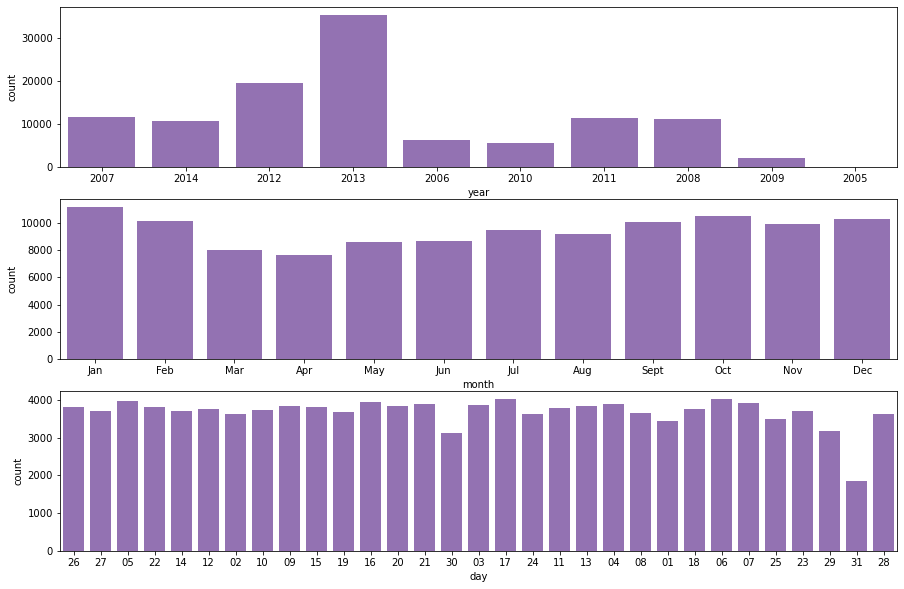

In [85]:
# Let's plot countplots of loans over year, month and day of the month
fig, ax = plt.subplots(nrows=3, figsize = [15,10])
default_color = sb.color_palette()[4]
# sb.countplot(data = prosper, x = 'year', color = default_color, ax = ax[0], order = prosper['year'].value_counts(ascending = True).index)
sb.countplot(data = prosper, x = 'year', color = default_color, ax = ax[0])
sb.countplot(data = prosper, x = 'month', color = default_color, ax = ax[1])
sb.countplot(data = prosper, x = 'day', color = default_color, ax = ax[2]);

Let's take a look at the distribution of borrower APR.

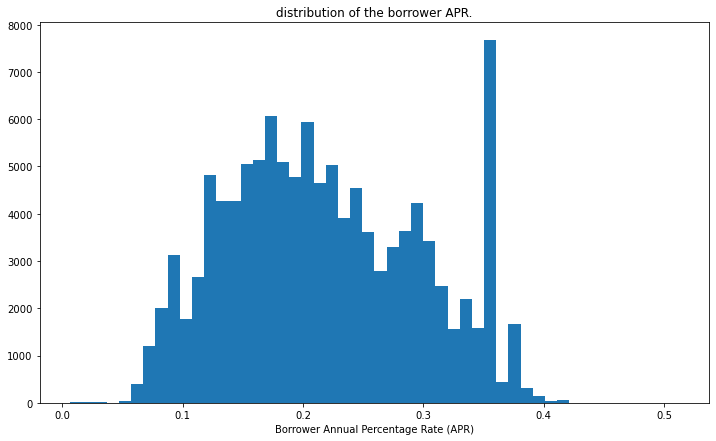

In [81]:
bins = 50
plt.figure(figsize=[12, 7])
plt.hist(data = prosper, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower Annual Percentage Rate (APR)');
plt.title('distribution of the borrower APR.');

At first glance we can see an oddly excited record between 0.3 and 0.4. The distribution of APR looks multimodal. 

In [20]:
# Let' look at loans with with APR greater than 0.4
prosper_sub[prosper_sub.BorrowerAPR>0.44]

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),Occupation,...,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year,month,day,time
18326,1795,3000,Defaulted,0,NaN,0.45857,0.4500,10000.000000,NaN,NaN,...,NaN,NaN,0.10252,153.21,NaN,21,2006,Mar,11,15:43:45.393000000
22195,1849,1789,Chargedoff,0,NaN,0.46201,0.4500,2916.666667,NaN,NaN,...,NaN,NaN,0.35430,91.37,NaN,21,2006,Mar,12,13:44:15.060000000
36018,690,1500,Completed,0,NaN,0.51229,0.4975,2838.000000,NaN,NaN,...,NaN,NaN,0.02852,80.94,NaN,9,2006,Feb,23,13:57:02.087000000
56761,2231,3000,Defaulted,0,NaN,0.50633,0.4975,0.000000,NaN,NaN,...,NaN,NaN,0.03909,161.88,NaN,21,2006,Mar,16,19:30:16.753000000
82043,1112,3000,Defaulted,0,NaN,0.48873,0.4800,1583.333333,NaN,NaN,...,NaN,NaN,0.10021,158.66,NaN,20,2006,Mar,02,19:00:17.593000000
103973,1366,2800,Defaulted,0,NaN,0.45857,0.4500,3750.000000,NaN,NaN,...,NaN,NaN,0.19413,143.00,NaN,22,2006,Mar,06,22:36:53.753000000


Here we see that 6 borrowers with largest APR have small loan amount and don't have records of Prosper rating and employment status.

Let's look at the distribution of DebtToIncomeRatio

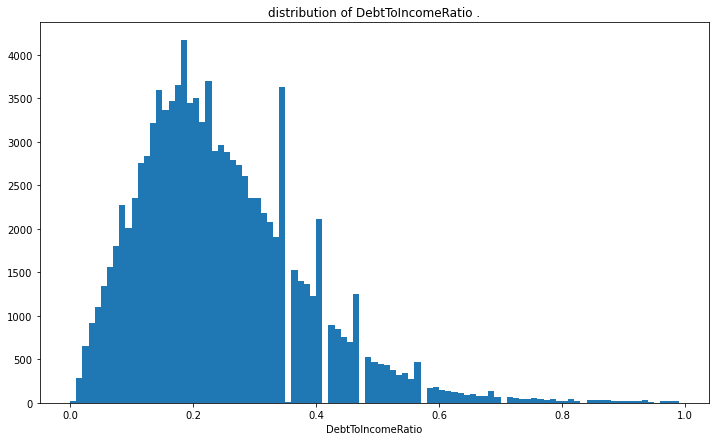

In [21]:
# distribution of DebtToIncomeRatio 
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[12, 7])
plt.hist(data = prosper_sub, x = 'DebtToIncomeRatio', bins = bins);
plt.title('distribution of DebtToIncomeRatio .');
plt.xlabel('DebtToIncomeRatio');

We see a unimodal peak around 0.2

Let's take a look at the distribution of the LoanOriginalAmount

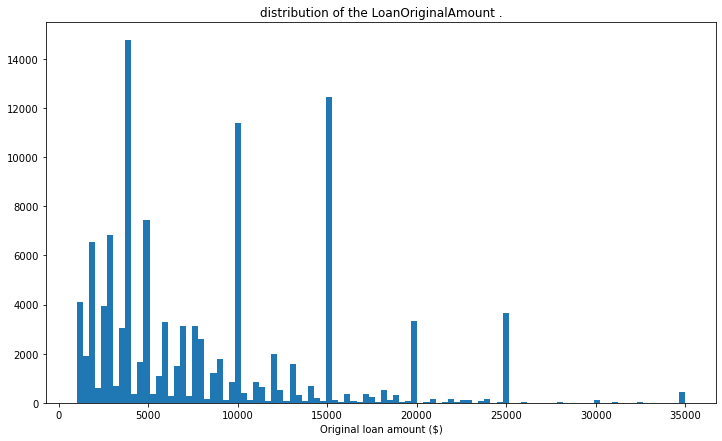

In [22]:
plt.figure(figsize=[12, 7])
plt.hist(data = prosper_sub, x = 'LoanOriginalAmount', bins = 100);
plt.title('distribution of the LoanOriginalAmount .');
plt.xlabel('Original loan amount ($)');

We see large spikes at 10k, 15k, 20k, 25k and 35k, this might indicate that large loan amounts are in multiples of 5k.

Let's see the distribution of stated monthly income

In [23]:
prosper_sub.StatedMonthlyIncome.max()

1750002.916667

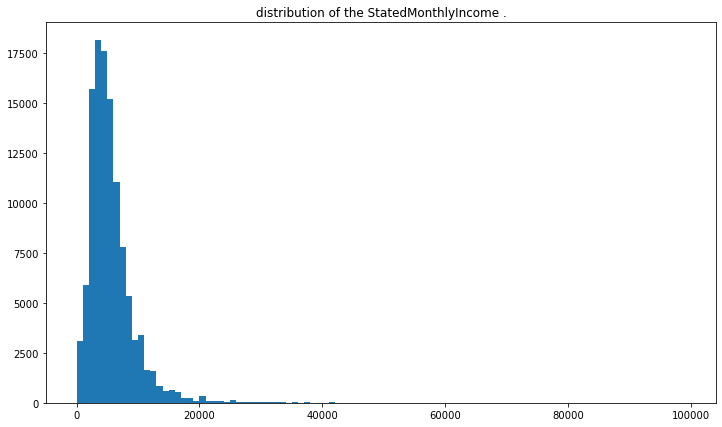

In [24]:
# Distribution of stated monthly income
 
bins = np.arange(0, 100000, 1000)
plt.figure(figsize=[12, 7])
plt.title('distribution of the StatedMonthlyIncome .');
plt.hist(data = prosper_sub, x = 'StatedMonthlyIncome', bins=bins);

The distribution of stated monthly income is severely right screwed, 30k seems to be the most stated Monthly income. We can see ouliers as well

In [25]:
# Let's take a look at  borrowers with stated monthly income greater than 100,000
prosper_sub[prosper_sub.StatedMonthlyIncome>100000]

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),Occupation,...,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year,month,day,time
8066,500651,2000,Completed,1,IL,0.35643,0.3199,4.166667e+05,HR,Police Officer/Correction Officer,...,Employed,5.0,0.00,87.10,34.0,10,2011,Apr,02,13:58:32.227000000
8870,66246,12500,Chargedoff,0,CT,0.12700,0.1200,2.083333e+05,NaN,Other,...,Not available,15.0,0.01,415.18,NaN,105,2006,Nov,26,00:25:07.540000000
17411,501462,7500,Completed,1,HI,0.35643,0.3199,4.833333e+05,E,Professional,...,Employed,15.0,0.00,326.62,16.0,128,2011,Apr,08,21:58:21.847000000
35218,461028,1000,Completed,3,VA,0.07389,0.0705,1.083333e+05,AA,Attorney,...,Full-time,9.0,NaN,0.00,24.0,58,2010,Jun,01,18:34:31.423000000
45028,589104,4000,Current,1,KS,0.33973,0.2999,1.500000e+05,E,Nurse (RN),...,Self-employed,3.0,NaN,169.78,14.0,15,2012,May,15,12:49:18.987000000
53014,694401,4000,Completed,3,CA,0.25785,0.1795,6.185478e+05,D,Other,...,Self-employed,14.0,NaN,366.62,25.0,93,2013,Jan,04,20:02:24.207000000
53167,560783,4000,Current,3,OR,0.35797,0.3177,1.750003e+06,HR,Professional,...,Self-employed,6.0,NaN,173.71,33.0,2,2012,Feb,20,12:53:44.577000000
56867,120075,25000,Completed,0,NC,0.11144,0.1045,1.850818e+05,NaN,Other,...,Self-employed,4.0,0.01,811.97,12.0,434,2007,Apr,06,18:12:51.793000000
57133,499194,4000,Current,2,CT,0.35643,0.3199,4.666667e+05,E,Other,...,Employed,2.0,0.00,174.20,23.0,72,2011,Mar,24,14:50:00.220000000
59298,558458,15000,Current,20,CT,0.24246,0.2049,1.208333e+05,C,Other,...,Self-employed,4.0,NaN,561.21,6.0,204,2012,Feb,13,07:43:35.380000000


We see that  borrowers with stated monthly income greater than 100,000 are mostly Self-employed	

Going on, let's Look at the distributions of Occupation, Prosper rating and employment status

In [26]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
prosper_sub['ProsperRating (Alpha)'] = prosper_sub['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
prosper_sub['EmploymentStatus'] = prosper_sub['EmploymentStatus'].astype(ordered_var)

C:\Users\j\AppData\Local\Temp\ipykernel_9108\3563327831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper_sub['ProsperRating (Alpha)'] = prosper_sub['ProsperRating (Alpha)'].astype(ordered_var)
C:\Users\j\AppData\Local\Temp\ipykernel_9108\3563327831.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper_sub['EmploymentStatus'] = prosper_sub['EmploymentStatus'].astype(ordered_var)


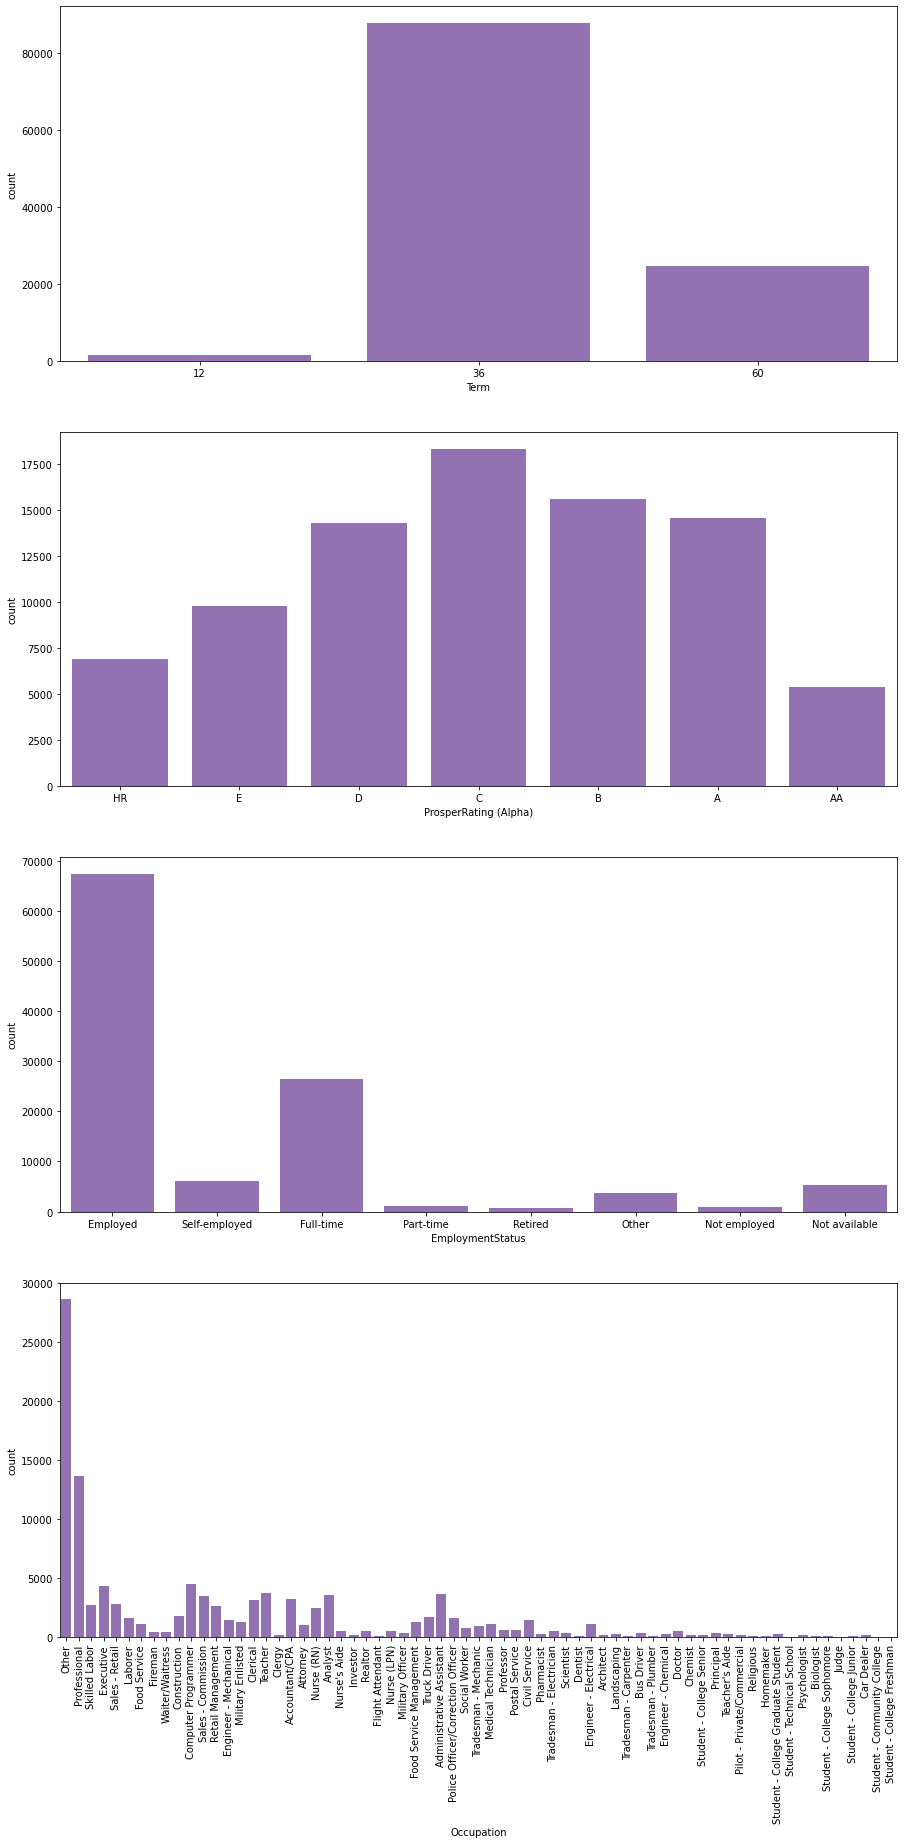

In [27]:
fig, ax = plt.subplots(nrows=4, figsize = [15,30])
sb.countplot(data = prosper_sub, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = prosper_sub, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = prosper_sub, x = 'EmploymentStatus', color = default_color, ax = ax[2]);
sb.countplot(data = prosper_sub, x = 'Occupation', color = default_color, ax = ax[3]);
plt.xticks(rotation=90);

- Most loans are taken for  36 months.
- The least of the borrowers are students. 
- The ratings of most of the borrowers are among D to A, C having the higest.
- Most of borrowers are employed and full-time.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I am tempted to look at the percentage of borrowers whose stated monthly income greater than 30k.
30k monthly income will mean that they earn a total of 360,000 annualy, this might be unlikely.
my bias might be based on personal percception of the loan market, therefore I will skip checking this further.

The distribution of borrowers APR seems  multimodal. There are no unusual points and no need to perform any transformations.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distributions of stated monthly income is highly right screwed. Most stated monthly incomes are around 30k, but some of are incredibly unexpectedly high (100,000+). 

Quite surprisingly, most of borrowers with monthly income above 100k loan less than 5k dollars, It's most likely the very large stated monthly income may be made up numbers.

ListingCreationDate column was splitted into into year,month,day,time for better view and analysis

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Let's start by taking a look at the correlations present between features in the data.

In [28]:
# Let's organise both numeric variables and categorical variables for easy use

numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio']
category_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus','Occupation']

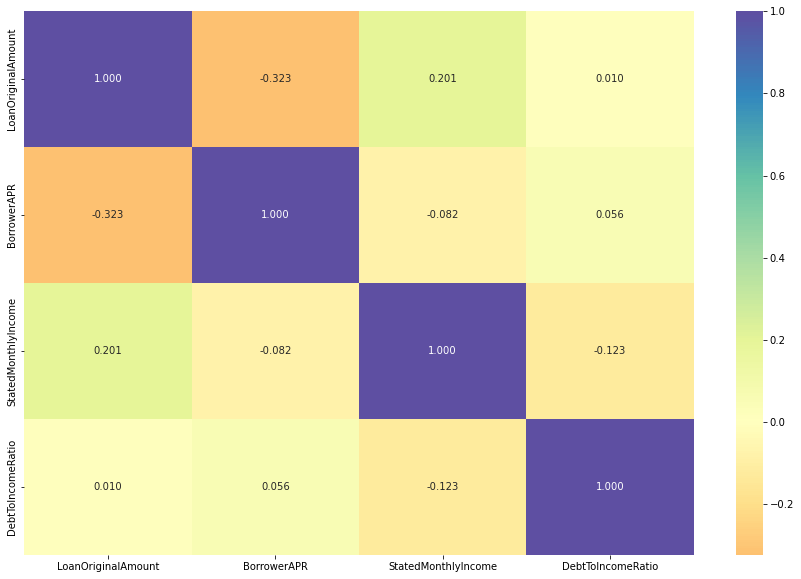

In [29]:
# correlation plot using Heatmaps
plt.figure(figsize = [15, 10])
sb.heatmap(prosper_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'Spectral', center = 0);

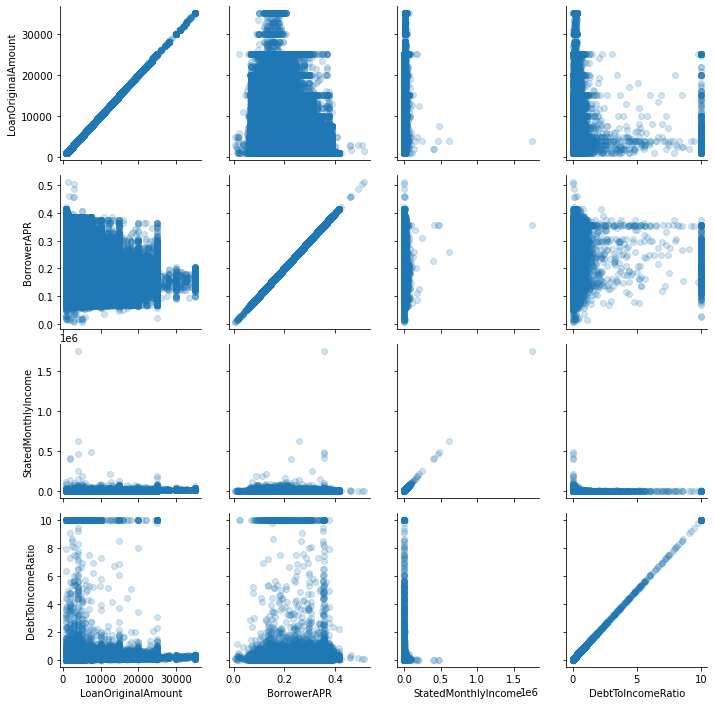

In [30]:
g = sb.PairGrid(data = prosper_sub, vars = numeric_vars);
g.map(plt.scatter, alpha=0.2);

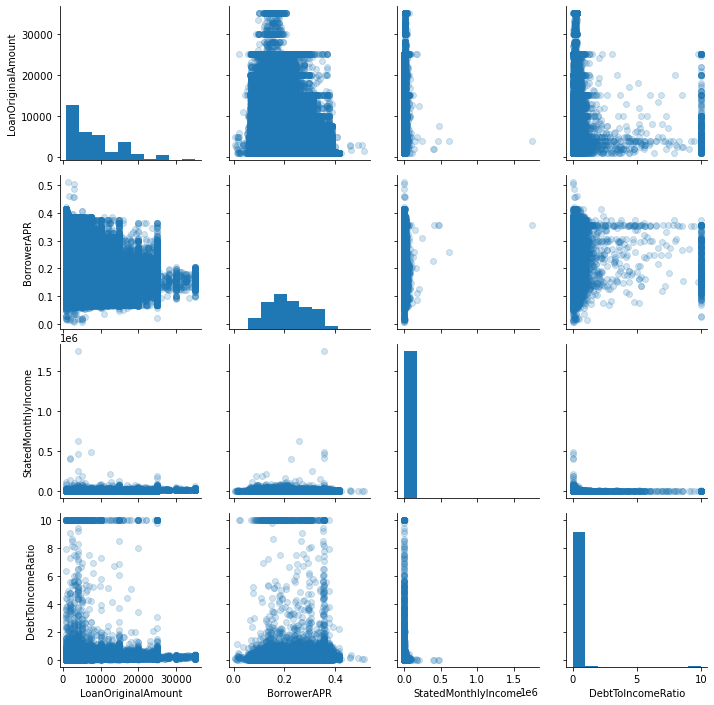

In [31]:
g = sb.PairGrid(data = prosper_sub, vars = numeric_vars);
# g.map(plt.scatter);
g.map_offdiag(plt.scatter, alpha=0.2);
g.map_diag(plt.hist);

The correlation coefficient of borrower APR and loan original amount is -0.323, the scatter plot also shows that these two variables are negatively correlated.

The loan original amount is positively correlated with the stated monthly income, this makes, since borrowers with more monthly income could loan more money.

Let's look at how borrower APR, stated monthly income and loan original amount correlate with the categorical variables.

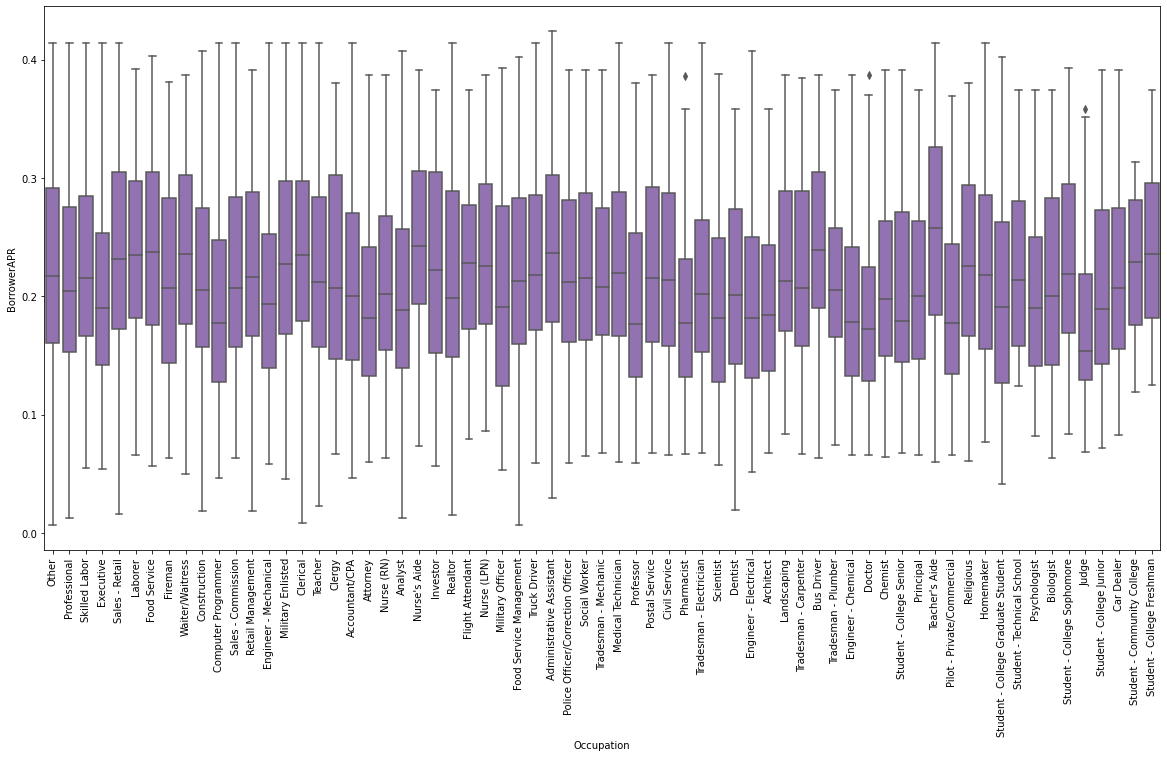

In [32]:
plt.figure(figsize = [20, 10])

sb.boxplot(data=prosper_sub, x='Occupation', y='BorrowerAPR', color=default_color)
plt.xticks(rotation=90);
# plt.ylim(ax1.get_ylim())

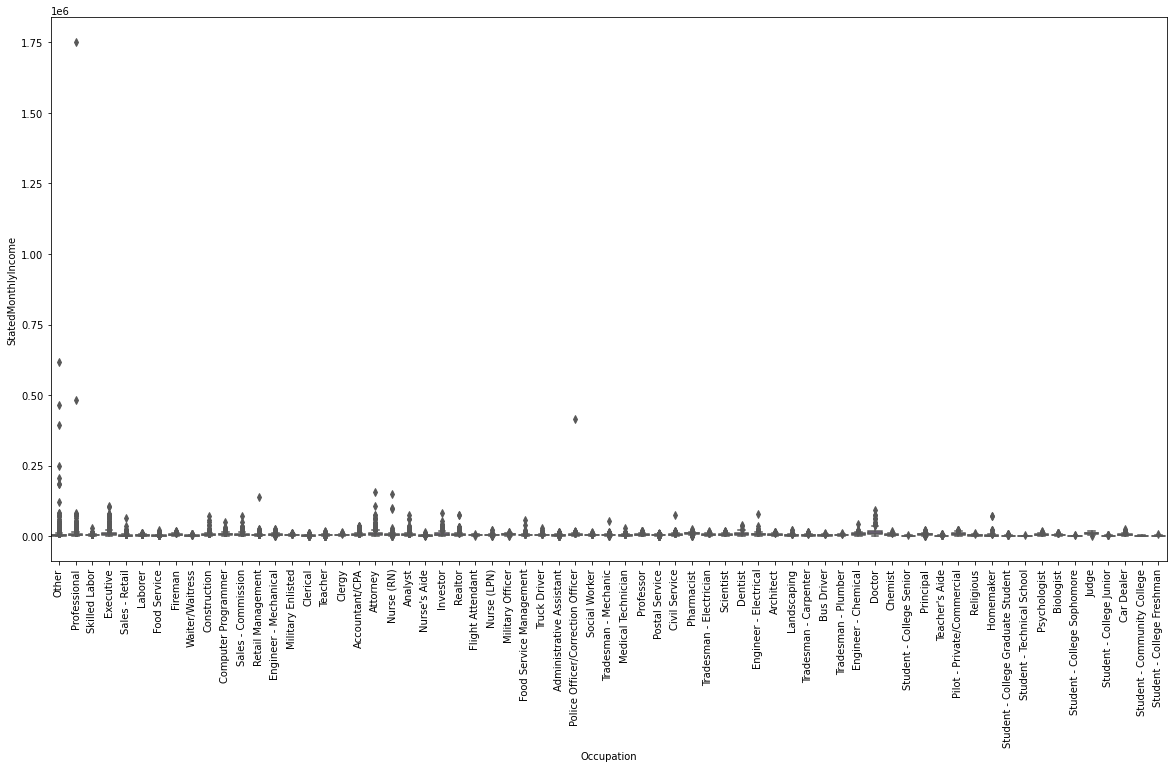

In [33]:
plt.figure(figsize = [20, 10])

sb.boxplot(data=prosper_sub, x='Occupation', y='StatedMonthlyIncome', color=default_color)
plt.xticks(rotation=90);

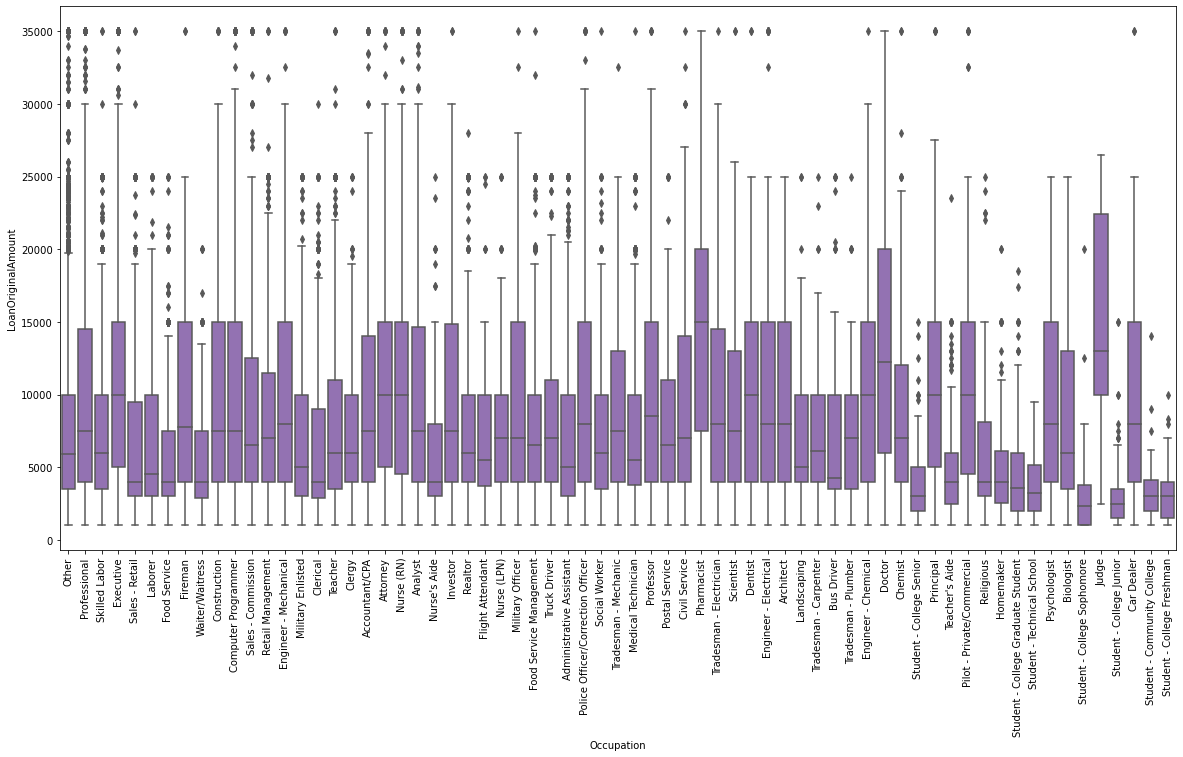

In [34]:
plt.figure(figsize = [20, 10])

sb.boxplot(data=prosper_sub, x='Occupation', y='LoanOriginalAmount', color=default_color)
plt.xticks(rotation=90);


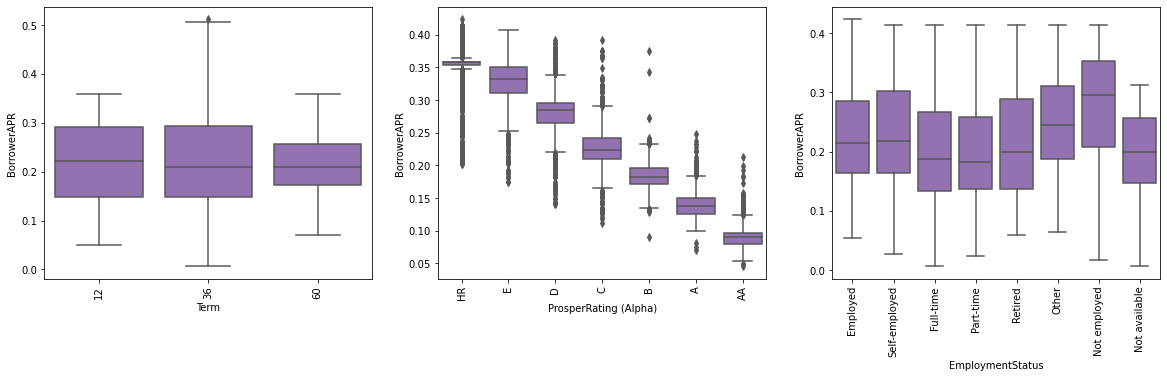

In [35]:
plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.boxplot(data=prosper_sub, x='Term', y='BorrowerAPR', color = default_color)
plt.xticks(rotation = 90); 

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=prosper_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color = default_color)
plt.xticks(rotation = 90);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.boxplot(data=prosper_sub, x='EmploymentStatus', y='BorrowerAPR', color = default_color)
plt.xticks(rotation = 90);


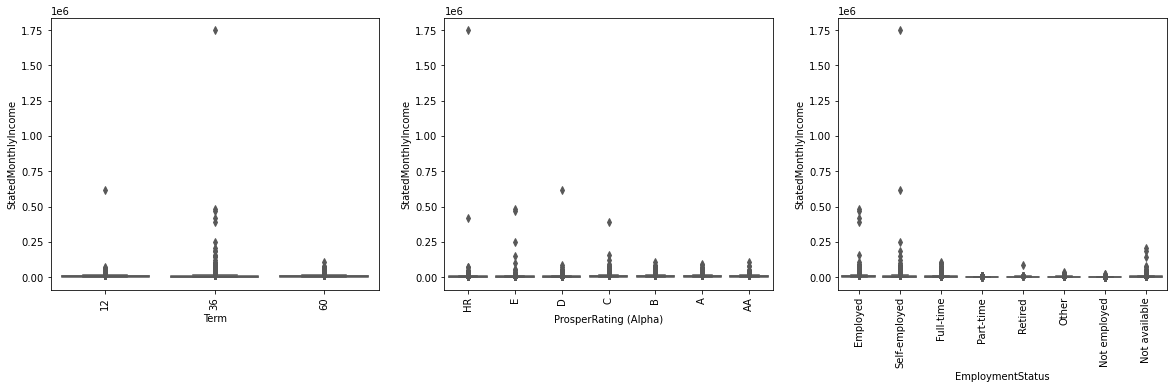

In [36]:
plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.boxplot(data=prosper_sub, x='Term', y='StatedMonthlyIncome', color = default_color)
plt.xticks(rotation = 90); 

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=prosper_sub, x='ProsperRating (Alpha)', y='StatedMonthlyIncome', color = default_color)
plt.xticks(rotation = 90);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.boxplot(data=prosper_sub, x='EmploymentStatus', y='StatedMonthlyIncome', color = default_color)
plt.xticks(rotation = 90);


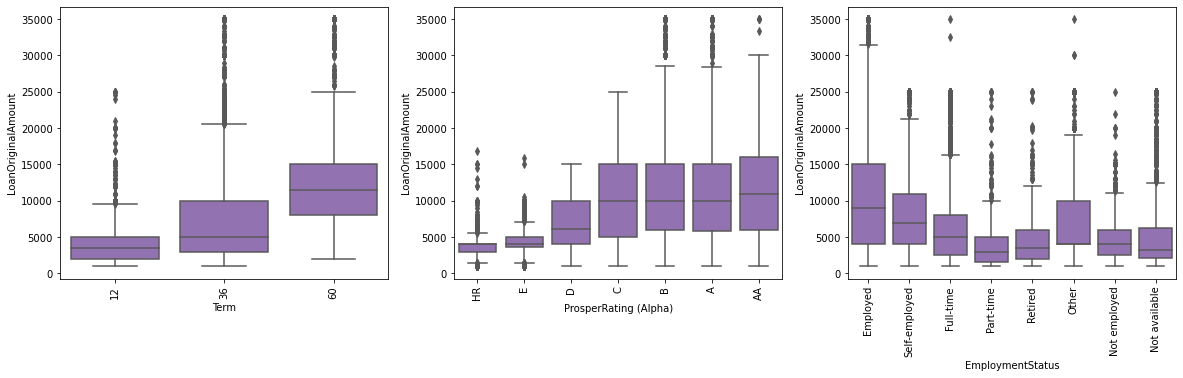

In [37]:
plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.boxplot(data=prosper_sub, x='Term', y='LoanOriginalAmount', color = default_color)
plt.xticks(rotation = 90); 

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=prosper_sub, x='ProsperRating (Alpha)', y='LoanOriginalAmount', color = default_color)
plt.xticks(rotation = 90);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.boxplot(data=prosper_sub, x='EmploymentStatus', y='LoanOriginalAmount', color = default_color)
plt.xticks(rotation = 90);


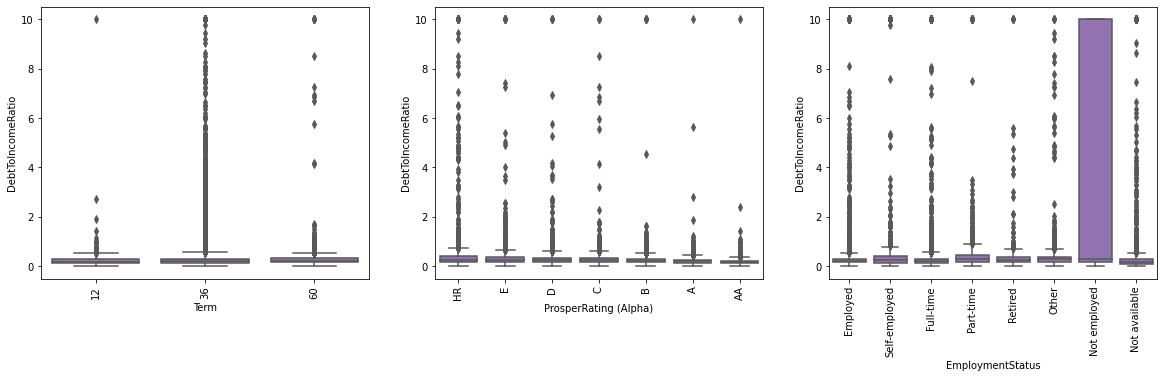

In [38]:
plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.boxplot(data=prosper_sub, x='Term', y='DebtToIncomeRatio', color = default_color)
plt.xticks(rotation = 90); 

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=prosper_sub, x='ProsperRating (Alpha)', y='DebtToIncomeRatio', color = default_color)
plt.xticks(rotation = 90);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.boxplot(data=prosper_sub, x='EmploymentStatus', y='DebtToIncomeRatio', color = default_color)
plt.xticks(rotation = 90);


- We see that loan amount is increased with longer of loan term. 
- The borrower APR decreases with the better rating. 
- Borrowers with the best Prosper ratings have the lowest APR.  


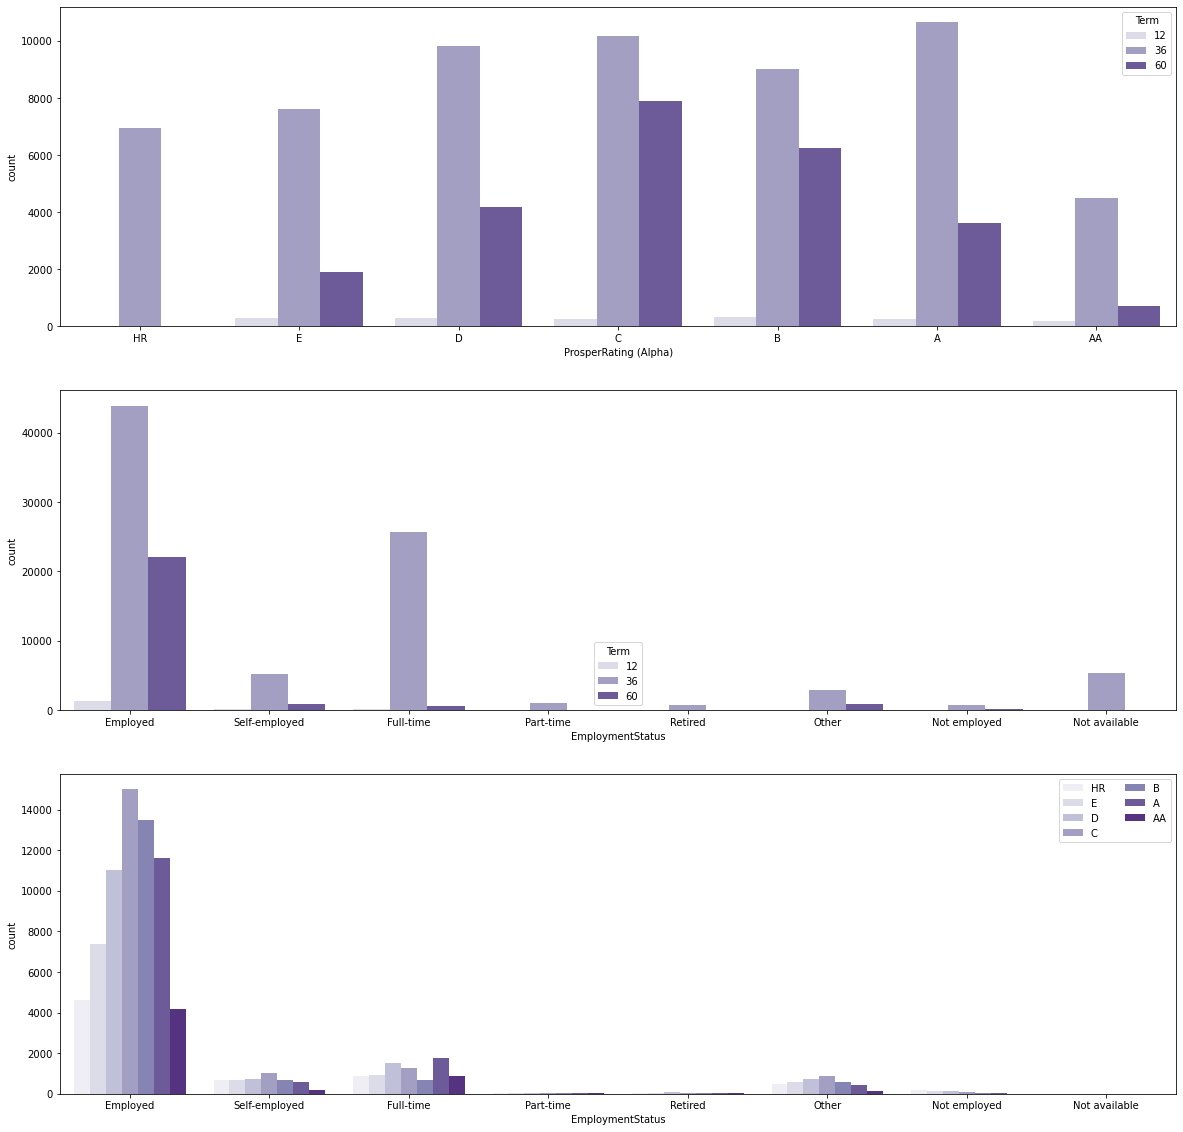

In [39]:
plt.figure(figsize = [20, 20])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = prosper_sub, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Purples')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = prosper_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Purples')

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = prosper_sub, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Purples')
ax.legend(loc = 1, ncol = 2);

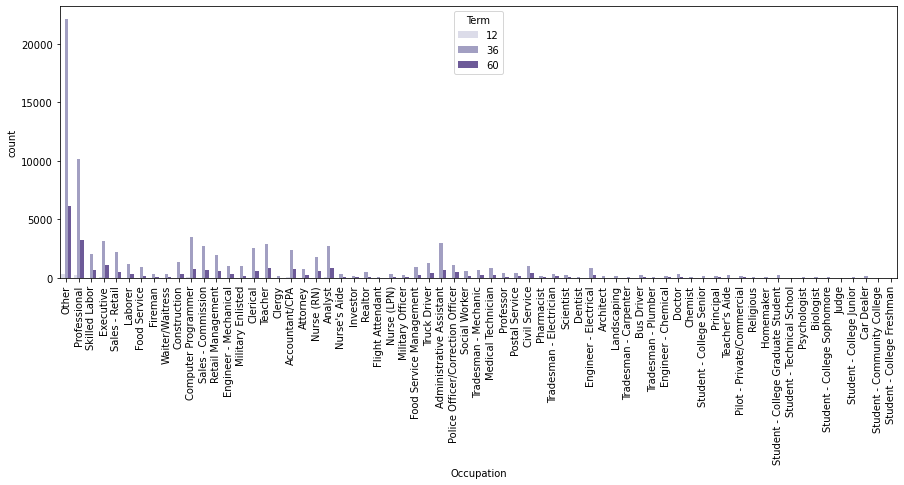

In [40]:
# plot of Occupation vs term
plt.figure(figsize = [15,5])
sb.countplot(data = prosper_sub, x = 'Occupation', hue = 'Term', palette = 'Purples');
plt.xticks(rotation=90);

- Borrowers with ProsperRating A mostly take a loan term of 36 months
- Mostly Borrowers with ProsperRating C take a longer loan term of 60 months
- It's logical that Employed Borrowers take longer loan terms of 36 and 60 months
- Borrowers with Professional take longer term loans

Let's take a look at how borrower APR and loan original amount are related.

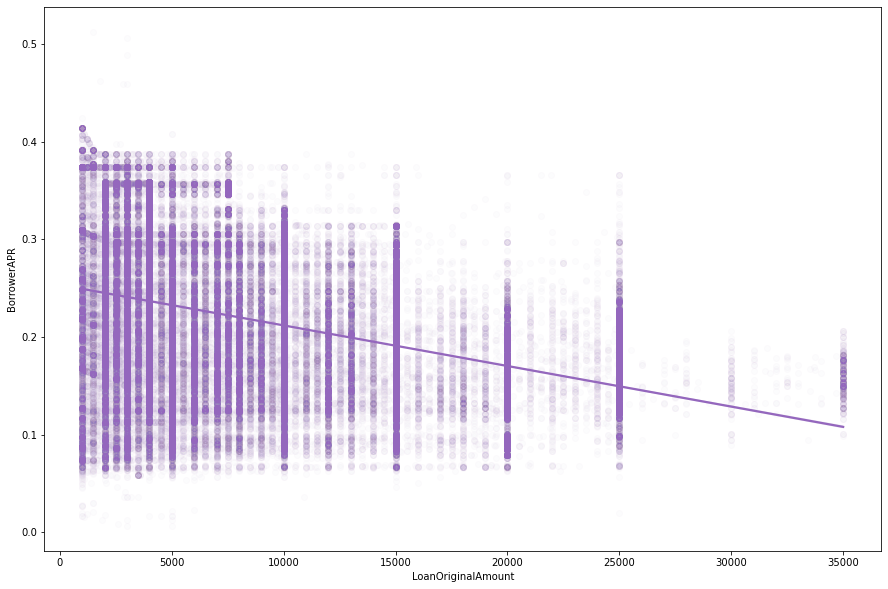

In [54]:
plt.figure(figsize = [15, 10])
sb.regplot(data = prosper_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.02}, color = default_color);

Here we see that the borrower APR is negatively correlated with loan amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


- Borrower APR is negatively associated with the loan original amount 
- Larger loan amount means lower APR. 
- The Prosper rating also has a strong effect on the borrower APR, 
- Prosper rating decreases with the better rating.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The loan original amount is positively correlated with the stated monthly income
- Borrowers with more monthly income could loan more money. 
- Borrowers with better rating also have larger monthly income and loan amount. 
- Prosper rating and term are proportionally related.  
- B and C ratings have Longer loan terms of more 60 month

## Multivariate Exploration

Here we will explore Prosper rating and term relationship between borrower APR and loan original amount.

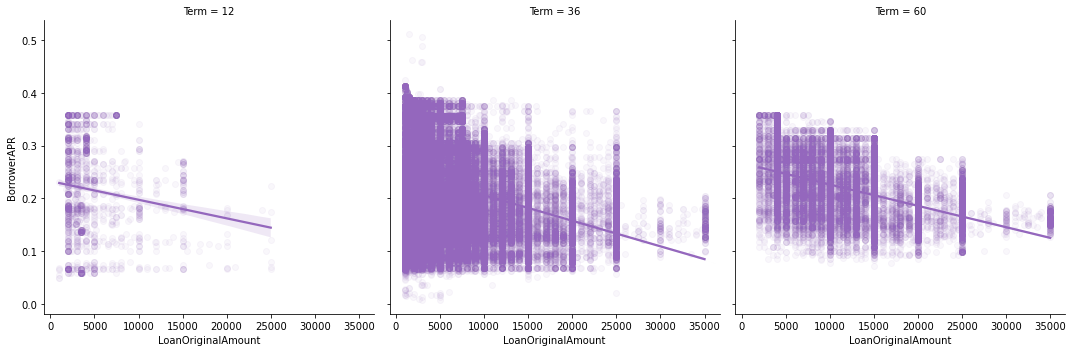

In [59]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data= prosper_sub, height=5, col='Term', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':1/20}, color = default_color);
g.add_legend();

Term doesn't seem to have any effect on the relationship between APR and loan amount

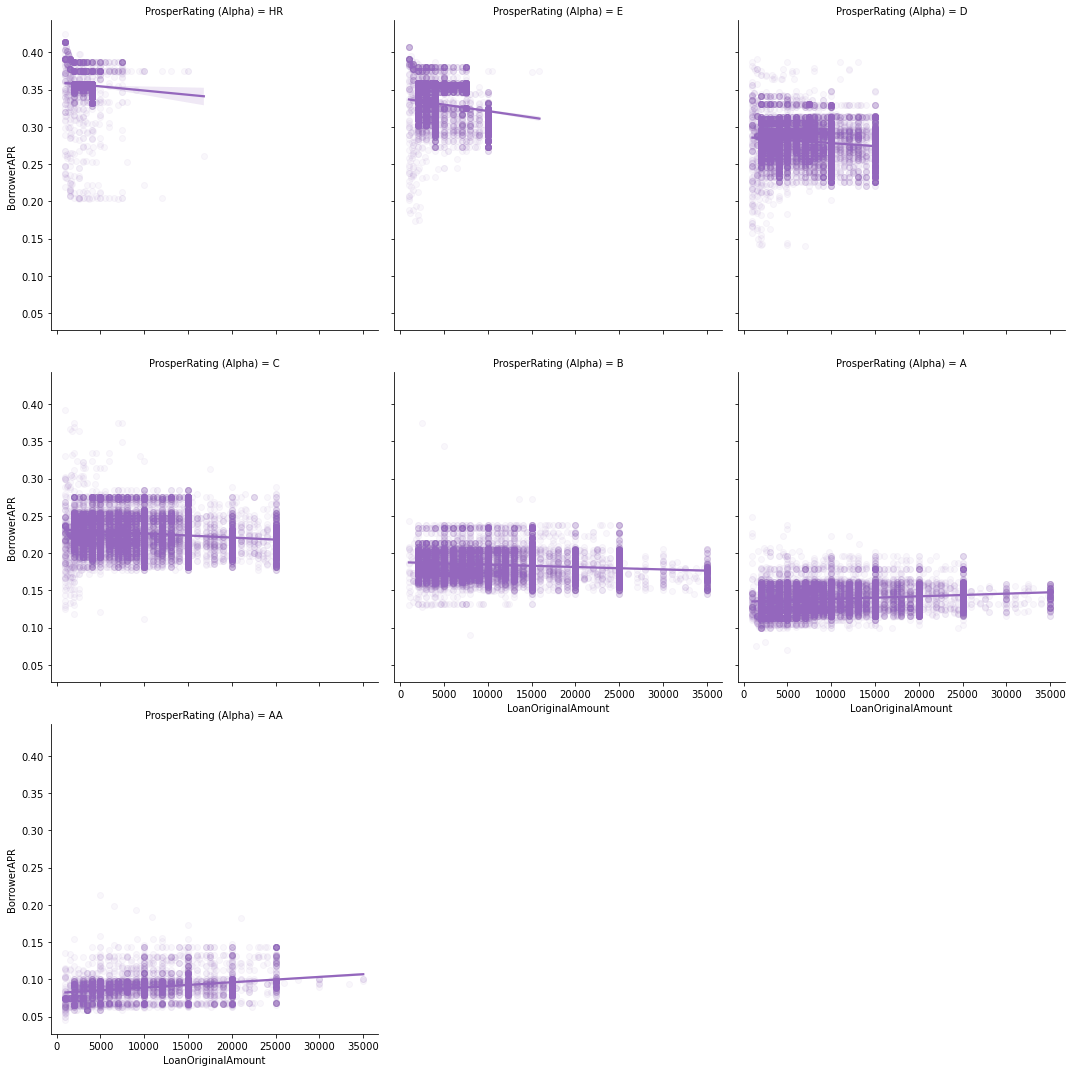

In [65]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=prosper_sub, height=5, col='ProsperRating (Alpha)', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':1/20}, color = default_color);
g.add_legend();

- The loan amount increases with better rating. 
- The borrower APR decreases with better rating. 
- The relationship between borrower APR and loan amount turns positive when the Prosper ratings are increased from HR to AA

It's logical that people with better rating (A or AA) tend to borrow more money.
People with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

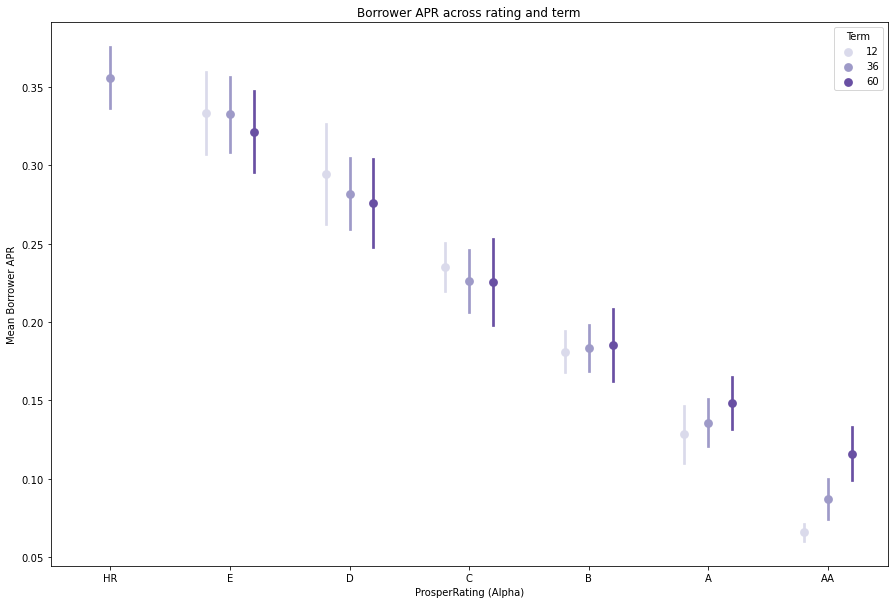

In [68]:
fig = plt.figure(figsize = [15,10])
ax = sb.pointplot(data = prosper_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

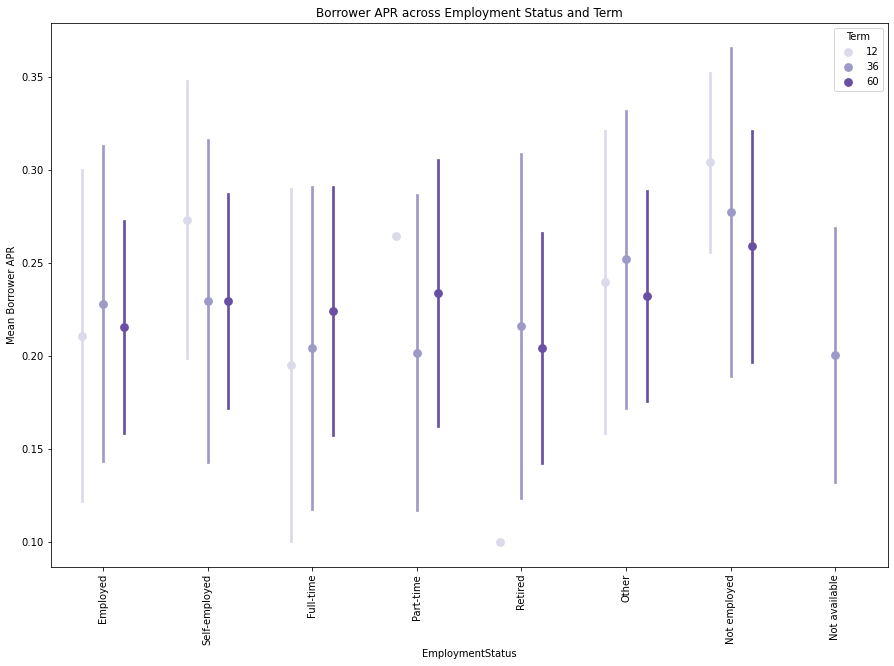

In [82]:
fig = plt.figure(figsize = [15,10])
ax = sb.pointplot(data = prosper_sub, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Employment Status and Term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

- We see that the Borrower APR decrease with the an increased Term for people with HR to C raings. 
- The APR increase with an increased borrow Term for people with B to AA ratings, .
- Unemployed borrowers have the highest APR

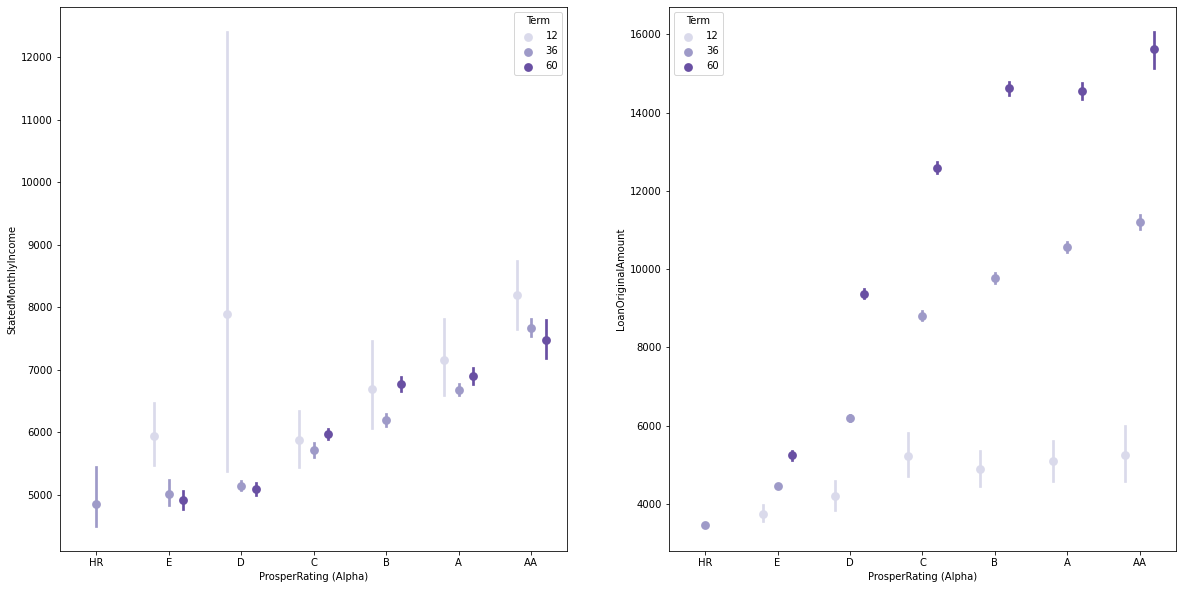

In [76]:
fig, ax = plt.subplots(ncols=2, figsize=[20,10])
sb.pointplot(data = prosper_sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = prosper_sub, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[1]);

- For stated monthly income, it doesn't seem like there is an interaction effect between term and rating, the pattern of term is similar among different ratings. 
- But for loan amount, there is an interaction between term and rating. With better Prosper rating, the loan amount of each three terms increases.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- We investigated borrower APR against loan amount by looking at the impact of the Prosper rating and loan Terms. 
- The multivariate exploration showed that the relationship between borrower APR and loan amount becomes positive when the Prosper ratings increased from HR to AA. 
- Looking at Prosper rating and term effects on loan amount, we see that with better Prosper rating, the loan amount of all three terms increases


### Were there any interesting or surprising interactions between features?

- A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, 
- The correlation is positive when the ratings are A and AA. 
- Interesstingly the borrower APR decrease with the increase of borrow term for people with HR to C raings. 
- But for people with B to AA ratings, the APR increase with the borrow term.

## Conclusions

It's apparent that this data holds many questions worthy of exploration, and promisses a rewarding find.
There is more to be learnt



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

